<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/word2vec_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from gensim.models import Word2Vec
import gensim

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
import os
dataset_path = 'C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem'
data = []
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    
    # Check if it's a directory (category folder)
    if os.path.isdir(category_path):
        print(category_path)
        for filename in os.listdir(category_path):
            if filename.endswith('.txt'):
                file_path = os.path.join(category_path, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        article_text = file.read().strip()  # Read and remove leading/trailing spaces
                        data.append({'articles': article_text, 'category': category})
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

dataframe = pd.DataFrame(data)

C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Avto
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Ayollar
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Iqtisodiyot
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Jinoyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Madaniyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Pazandachilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Qonunchilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Salomatlik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Siyosat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Sport
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Texnologiya


In [4]:
print(dataframe)
category_counts = dataframe['category'].value_counts()
print(category_counts)

                                                 articles     category
0       tesla barcha elektromobil narx osh o‘zbekiston...         Avto
1       uzauto motors o‘rindiq isi mode va magnitafon ...         Avto
2       lego‘ ming ortiq deta yordam to‘liq o‘lcham fe...         Avto
3       naman moskvich ariq ag‘dar ket oqibat bir kish...         Avto
4       qo‘qon ypx xodim mashina ust sudra ket haydovc...         Avto
...                                                   ...          ...
102955  sony mm qalinlik yangi xperia t smartfon taqdi...  Texnologiya
102956  acer kompaniya yangi iconia a planshet olmaota...  Texnologiya
102957  lg g ommaboplik samsu galaxy s’n ort qol janub...  Texnologiya
102958  vertu kompaniya ming yevrolik titan smartfon c...  Texnologiya
102959  apple yangi ios operatsion tizim taqdim et app...  Texnologiya

[102960 rows x 2 columns]
Texnologiya      17541
Qonunchilik      14779
Sport            13403
Madaniyat        12798
Siyosat          12247
Iqtiso

In [5]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

unique_category_labels = dataframe[['category', 'labels']].drop_duplicates()
print(unique_category_labels)

                                                 articles     category  labels
0       tesla barcha elektromobil narx osh o‘zbekiston...         Avto       0
1       uzauto motors o‘rindiq isi mode va magnitafon ...         Avto       0
2       lego‘ ming ortiq deta yordam to‘liq o‘lcham fe...         Avto       0
3       naman moskvich ariq ag‘dar ket oqibat bir kish...         Avto       0
4       qo‘qon ypx xodim mashina ust sudra ket haydovc...         Avto       0
...                                                   ...          ...     ...
102955  sony mm qalinlik yangi xperia t smartfon taqdi...  Texnologiya      10
102956  acer kompaniya yangi iconia a planshet olmaota...  Texnologiya      10
102957  lg g ommaboplik samsu galaxy s’n ort qol janub...  Texnologiya      10
102958  vertu kompaniya ming yevrolik titan smartfon c...  Texnologiya      10
102959  apple yangi ios operatsion tizim taqdim et app...  Texnologiya      10

[102960 rows x 3 columns]
            category  lab

In [6]:
# mixing each categories and thier labels
dataframe=dataframe.sample(frac=1)

In [7]:
dataframe['word_len'] = dataframe['articles'].str.split().str.len()
print(dataframe['word_len'].mean())
print(dataframe)

mean_word_len_by_category = dataframe.groupby('category', as_index=False)['word_len'].mean()
print(mean_word_len_by_category)

267.79334693084695
                                                 articles     category  \
94124   amazon suv o‘tkaz elektron kitob taqdim et ame...  Texnologiya   
41026   o‘zbekiston respublika ma’muriy javobgarlik to...  Qonunchilik   
8454    kimyoviy mahsulot foydalan soch dazmol tekisla...      Ayollar   
32189   xvorostovskiy oila gul o‘rn xayriya qil chaq y...    Madaniyat   
68385   o‘zbekiston prezident shavkat mirziyoyev may x...      Siyosat   
...                                                   ...          ...   
30342   o‘zbekiston haqida kino ol istag bo‘l xorijlik...    Madaniyat   
47864   ipoteka kredit ber kengay boʻyi choratadbir ta...  Qonunchilik   
100156  toshkent fleshka savdo majmuas sot planshet na...  Texnologiya   
61704   prezident bugun poytaxt yangihayot tuman barpo...      Siyosat   
49081   oʻzbekinvest milliy kompaniya ajga qay tashkil...  Qonunchilik   

        labels  word_len  
94124       10        96  
41026        6       103  
8454       

In [8]:
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    return rep2


In [9]:
# apply normalization and special characters removal
# dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [10]:
# special symbol removal
dataframe['articles']=dataframe['articles'].str.replace("O'",'O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("G'",'G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("o'",'o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("g'",'g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('O`','O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('G`','G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('o`','o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('g`','g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("[^\w\s‘’`']",'',regex=True)
dataframe['articles'] = dataframe['articles'].str.replace('\n\n', '. ', regex=False)
dataframe['articles'] = dataframe['articles'].str.replace('\n', '. ', regex=False)
print(dataframe)
print(dataframe.head())

                                                 articles     category  \
94124   amazon suv o‘tkaz elektron kitob taqdim et ame...  Texnologiya   
41026   o‘zbekiston respublika ma’muriy javobgarlik to...  Qonunchilik   
8454    kimyoviy mahsulot foydalan soch dazmol tekisla...      Ayollar   
32189   xvorostovskiy oila gul o‘rn xayriya qil chaq y...    Madaniyat   
68385   o‘zbekiston prezident shavkat mirziyoyev may x...      Siyosat   
...                                                   ...          ...   
30342   o‘zbekiston haqida kino ol istag bo‘l xorijlik...    Madaniyat   
47864   ipoteka kredit ber kengay boʻyi choratadbir ta...  Qonunchilik   
100156  toshkent fleshka savdo majmuas sot planshet na...  Texnologiya   
61704   prezident bugun poytaxt yangihayot tuman barpo...      Siyosat   
49081   oʻzbekinvest milliy kompaniya ajga qay tashkil...  Qonunchilik   

        labels  word_len  
94124       10        96  
41026        6       103  
8454         1       677  
321

In [11]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [12]:
dataframe=dataframe[['articles','labels']]
print(dataframe)

                                                 articles  labels
94124   amazon suv o‘tkaz elektron kitob taqdim et ame...      10
41026   o‘zbekiston respublika ma’muriy javobgarlik to...       6
8454    kimyoviy mahsulot foydalan soch dazmol tekisla...       1
32189   xvorostovskiy oila gul o‘rn xayriya qil chaq y...       4
68385   o‘zbekiston prezident shavkat mirziyoyev may x...       8
...                                                   ...     ...
30342   o‘zbekiston haqida kino ol istag bo‘l xorijlik...       4
47864   ipoteka kredit ber kengay boʻyi choratadbir ta...       6
100156  toshkent fleshka savdo majmuas sot planshet na...      10
61704   prezident bugun poytaxt yangihayot tuman barpo...       8
49081   oʻzbekinvest milliy kompaniya ajga qay tashkil...       6

[102960 rows x 2 columns]


In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(dataframe['articles'],dataframe['labels'], test_size=0.20, random_state=42)

In [14]:
from gensim.models import Word2Vec
sentences = [document.split() for document in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [15]:
print(w2v_model)

Word2Vec(vocab=53306, vector_size=100, alpha=0.025)


In [16]:
import numpy as np

def vectorize(sentence):
    words = sentence.split()
    
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
clf = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', solver='adam', max_iter=1000, verbose=True)
clf.fit(X_train, y_train)  # relu

Iteration 1, loss = 0.49355934
Iteration 2, loss = 0.28953522
Iteration 3, loss = 0.26865669
Iteration 4, loss = 0.25485172
Iteration 5, loss = 0.24521472
Iteration 6, loss = 0.23672140
Iteration 7, loss = 0.23081282
Iteration 8, loss = 0.22525563
Iteration 9, loss = 0.22032088
Iteration 10, loss = 0.21615979
Iteration 11, loss = 0.21283908
Iteration 12, loss = 0.21055258
Iteration 13, loss = 0.20698256
Iteration 14, loss = 0.20380800
Iteration 15, loss = 0.20283782
Iteration 16, loss = 0.19974298
Iteration 17, loss = 0.19751472
Iteration 18, loss = 0.19521476
Iteration 19, loss = 0.19375924
Iteration 20, loss = 0.19148356
Iteration 21, loss = 0.19011668
Iteration 22, loss = 0.18776439
Iteration 23, loss = 0.18635962
Iteration 24, loss = 0.18520429
Iteration 25, loss = 0.18335433
Iteration 26, loss = 0.18229295
Iteration 27, loss = 0.18194373
Iteration 28, loss = 0.17913047
Iteration 29, loss = 0.17847002
Iteration 30, loss = 0.17662522
Iteration 31, loss = 0.17605581
Iteration 32, los

Iteration 253, loss = 0.09433164
Iteration 254, loss = 0.09366889
Iteration 255, loss = 0.09407784
Iteration 256, loss = 0.09397520
Iteration 257, loss = 0.09368536
Iteration 258, loss = 0.09406125
Iteration 259, loss = 0.09297593
Iteration 260, loss = 0.09441824
Iteration 261, loss = 0.09287785
Iteration 262, loss = 0.09268794
Iteration 263, loss = 0.09335095
Iteration 264, loss = 0.09322464
Iteration 265, loss = 0.09193258
Iteration 266, loss = 0.09214661
Iteration 267, loss = 0.09168530
Iteration 268, loss = 0.09181322
Iteration 269, loss = 0.09206695
Iteration 270, loss = 0.09183703
Iteration 271, loss = 0.09180442
Iteration 272, loss = 0.09117075
Iteration 273, loss = 0.09120287
Iteration 274, loss = 0.09234599
Iteration 275, loss = 0.09117679
Iteration 276, loss = 0.09064749
Iteration 277, loss = 0.09027834
Iteration 278, loss = 0.09090374
Iteration 279, loss = 0.09123630
Iteration 280, loss = 0.09052330
Iteration 281, loss = 0.09044601
Iteration 282, loss = 0.08941858
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

Accuracy: 0.9118104118104118
Precision: 0.912063649980641
Recall: 0.9118104118104118
F1 score: 0.9118506914010398
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1248
           1       0.78      0.81      0.80       521
           2       0.85      0.82      0.84      2456
           3       0.93      0.93      0.93       785
           4       0.95      0.95      0.95      2535
           5       0.98      0.97      0.98       406
           6       0.98      0.98      0.98      2946
           7       0.87      0.88      0.88       993
           8       0.88      0.91      0.89      2464
           9       0.99      0.98      0.98      2722
          10       0.90      0.88      0.89      3516

    accuracy                           0.91     20592
   macro avg       0.90      0.90      0.90     20592
weighted avg       0.91      0.91      0.91     20592



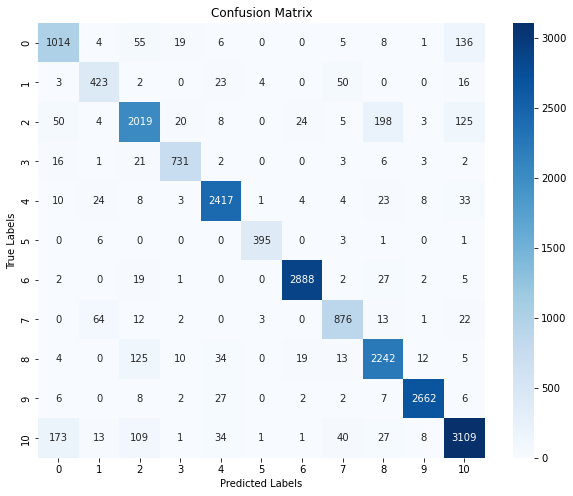

Confusion Matrix:
[[1014    4   55   19    6    0    0    5    8    1  136]
 [   3  423    2    0   23    4    0   50    0    0   16]
 [  50    4 2019   20    8    0   24    5  198    3  125]
 [  16    1   21  731    2    0    0    3    6    3    2]
 [  10   24    8    3 2417    1    4    4   23    8   33]
 [   0    6    0    0    0  395    0    3    1    0    1]
 [   2    0   19    1    0    0 2888    2   27    2    5]
 [   0   64   12    2    0    3    0  876   13    1   22]
 [   4    0  125   10   34    0   19   13 2242   12    5]
 [   6    0    8    2   27    0    2    2    7 2662    6]
 [ 173   13  109    1   34    1    1   40   27    8 3109]]


In [18]:
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted')) # Changed to 'weighted' average
print('Recall:', recall_score(y_test, y_pred, average='weighted')) # Changed to 'weighted' average
print('F1 score:', f1_score(y_test, y_pred, average='weighted')) # Changed to 'weighted' average
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# If you want to print the matrix as text:
print("Confusion Matrix:")
print(cm)

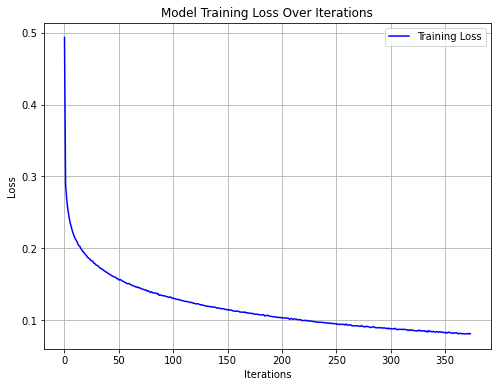

Iteration 1, loss = 0.08072174
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08031998
Iteration 1, loss = 0.07983960
Iteration 1, loss = 0.07999672
Iteration 1, loss = 0.07939650
Iteration 1, loss = 0.07973256
Iteration 1, loss = 0.08016867
Iteration 1, loss = 0.07922668
Iteration 1, loss = 0.07938024
Iteration 1, loss = 0.07993070
Iteration 1, loss = 0.07908514
Iteration 1, loss = 0.07949546
Iteration 1, loss = 0.07931841
Iteration 1, loss = 0.07898018
Iteration 1, loss = 0.07904602
Iteration 1, loss = 0.07930870
Iteration 1, loss = 0.07886561
Iteration 1, loss = 0.07892929
Iteration 1, loss = 0.07752150
Iteration 1, loss = 0.07887684
Iteration 1, loss = 0.07910373
Iteration 1, loss = 0.07968822
Iteration 1, loss = 0.07821537
Iteration 1, loss = 0.07901851
Iteration 1, loss = 0.07851282
Iteration 1, loss = 0.07705144
Iteration 1, loss = 0.07794726
Iteration 1, loss = 0.07842946
Iteration 1, loss = 0.07858067
Iteration 1

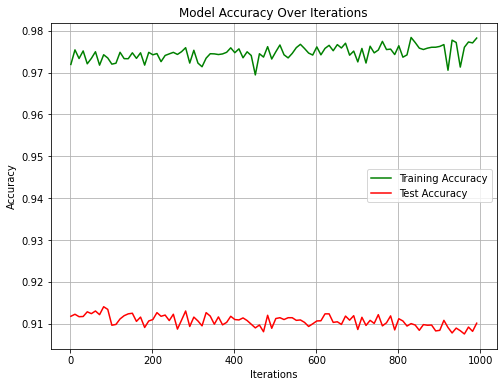

In [19]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(clf.loss_curve_, label='Training Loss', color='blue')
plt.title('Model Training Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Tracking accuracy over iterations (alternative method)
train_scores = []
test_scores = []

for i in range(1, clf.max_iter + 1, 10):  # Check accuracy every 10 iterations
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

# Plot accuracy over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, clf.max_iter + 1, 10), train_scores, label='Training Accuracy', color='green')
plt.plot(range(1, clf.max_iter + 1, 10), test_scores, label='Test Accuracy', color='red')
plt.title('Model Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()